In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Congruential Generator (LCG) parameters
LCG_A = 1664525
LCG_C = 1013904223
LCG_M = 2**32
LCG_SEED = 123456789  # Initial seed

# Initialize LCG state
lcg_state = LCG_SEED

def lcg_random():
    global lcg_state
    lcg_state = (LCG_A * lcg_state + LCG_C) % LCG_M
    return lcg_state / LCG_M

# PDF f(x) = 20 * x * (1 - x)^3
def f(x):
    return 20 * x * (1 - x) ** 3

# Find the smallest c value
def find_c():
    x_values = np.linspace(0, 1, 1000)
    f_values = f(x_values)
    c = np.max(f_values)
    return c

def get_iter_forx(num, c):
    X_ran = []
    itr_for_x = []

    for _ in range(num):
        count = 1
        while True:
            u = lcg_random()  # U ~ U[0,1]
            x = lcg_random()  # X generated from g, U[0,1]
            fx = f(x)  # f(x) = 20 * x * (1 - x)^3
            if u <= fx / c:
                itr_for_x.append(count)
                X_ran.append(x)
                break
            else:
                count += 1

    # Calculate and print the mean value of iterations
    mean_iterations = np.mean(itr_for_x)
    print(f'The mean value of count of number of iterations for {num} random values is {mean_iterations:.2f}')
    
    return X_ran, mean_iterations

# Find the smallest value of c
c = find_c()
print(f'The smallest value of c is {c}')

# Perform sampling and analysis for a specific sample size
num_samples = 10000
X_ran, mean_iterations = get_iter_forx(num_samples, c)


The smallest value of c is 2.1093735915600758
The mean value of count of number of iterations for 10000 random values is 2.11


In [78]:
def get_iter_forx_and_mean_variance(num, c):
    X_ran = []
    itr_for_x = []

    for _ in range(num):
        count = 1
        while True:
            u = lcg_random()  # U ~ U[0,1]
            x = lcg_random()  # X generated from g, U[0,1]
            fx = f(x)  # f(x) = 20 * x * (1 - x)^3
            if u <= fx / c:
                itr_for_x.append(count)
                X_ran.append(x)
                break
            else:
                count += 1

    # Calculate sample mean and variance
    sample_mean = np.mean(X_ran)
    sample_variance = np.var(X_ran)
    theoretical_mean = 0.4  # Expected value of the PDF f(x)
    
    print(f'The sample mean is {sample_mean:.4f}')
    print(f'The sample variance is {sample_variance:.4f}')
    print(f'Theoretical Mean: {theoretical_mean}')
    
    return X_ran

# Generate 10,000 random numbers
X_ran = get_iter_forx_and_mean_variance(num_samples, c)


The sample mean is 0.3353
The sample variance is 0.0317
Theoretical Mean: 0.4


In [79]:
def probability(X_ran, lower_bound, upper_bound):
    return np.mean((np.array(X_ran) >= lower_bound) & (np.array(X_ran) <= upper_bound))

# Calculate probability for the given range
prob = probability(X_ran, 0.25, 0.75)
exact_prob = np.trapz(f(np.linspace(0.25, 0.75, 1000)), dx=0.5/1000)
print(f'Approximate P(0.25 ≤ X ≤ 0.75) based on the sample: {prob:.4f}')
print(f'Exact value of P(0.25 ≤ X ≤ 0.75): {exact_prob:.4f}')


Approximate P(0.25 ≤ X ≤ 0.75) based on the sample: 0.6224
Exact value of P(0.25 ≤ X ≤ 0.75): 0.6166


In [80]:
def get_iter_forx_and_iterations(num, c):
    X_ran = []
    itr_for_x = []

    for _ in range(num):
        count = 1
        while True:
            u = lcg_random()  # U ~ U[0,1]
            x = lcg_random()  # X generated from g, U[0,1]
            fx = f(x)  # f(x) = 20 * x * (1 - x)^3
            if u <= fx / c:
                itr_for_x.append(count)
                X_ran.append(x)
                break
            else:
                count += 1

    # Calculate average number of iterations
    avg_iterations = np.mean(itr_for_x)
    print(f'Average number of iterations needed: {avg_iterations:.2f}')
    
    return X_ran

# Calculate average number of iterations for 10,000 samples
X_ran = get_iter_forx_and_iterations(num_samples, c)


Average number of iterations needed: 2.11


The sample mean is 0.3320
The sample variance is 0.0318
Theoretical Mean: 0.4


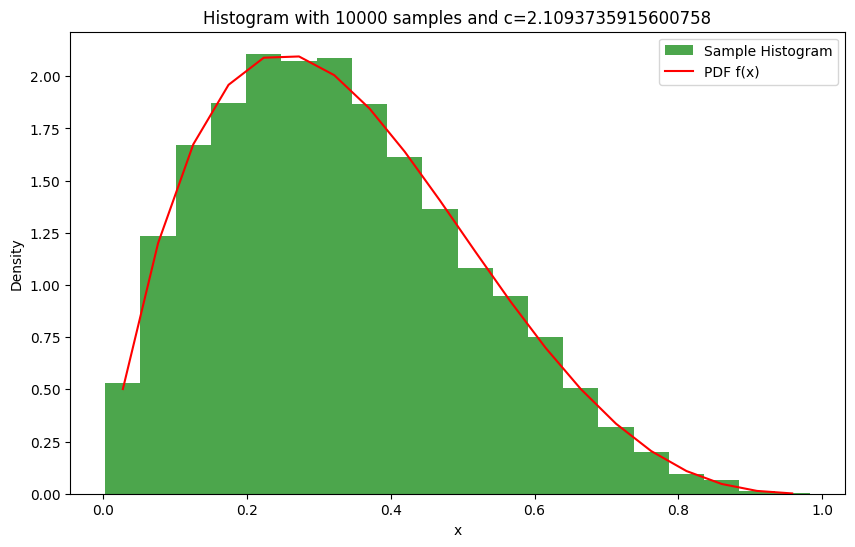

In [81]:
def plot_histogram_with_pdf(num, c):
    X_ran = get_iter_forx_and_mean_variance(num, c)
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    y, x, _ = plt.hist(X_ran, density=True, bins=20, alpha=0.7, color='g', label='Sample Histogram')
    bin_centers = (x[1:] + x[:-1]) / 2
    plt.plot(bin_centers, f(bin_centers) / np.sum(f(bin_centers) * (x[1] - x[0])), 'r-', label='PDF f(x)')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title(f'Histogram with {num} samples and c={c}')
    plt.legend()
    
    # Show plot
    plt.show()

# Plot histogram for 10,000 samples
plot_histogram_with_pdf(num_samples, c)



For c = 3.164060387340114
The mean value of count of number of iterations for 10000 random values is 3.14
The mean value of count of number of iterations for 10000 random values is 3.14
The sample mean is 0.3310
The sample variance is 0.0313
Theoretical Mean: 0.4


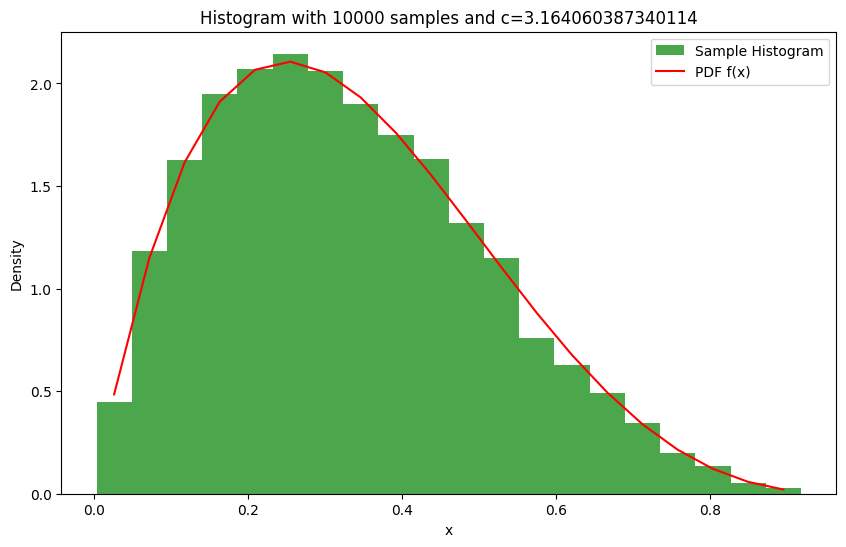

Average number of iterations needed: 3.14
Approximate P(0.25 ≤ X ≤ 0.75) based on the sample: 0.6190

For c = 4.2187471831201515
The mean value of count of number of iterations for 10000 random values is 4.20
The mean value of count of number of iterations for 10000 random values is 4.17
The sample mean is 0.3336
The sample variance is 0.0316
Theoretical Mean: 0.4


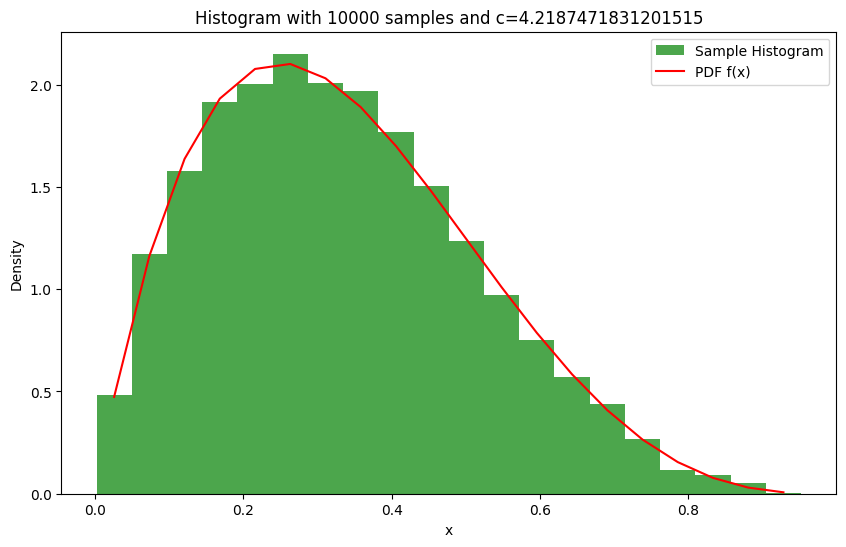

Average number of iterations needed: 4.17
Approximate P(0.25 ≤ X ≤ 0.75) based on the sample: 0.6175


In [82]:
c_values = [c * 1.5, c * 2]

for c in c_values:
    print(f'\nFor c = {c}')
    X_ran = get_iter_forx(num_samples, c)[0]
    sample_mean = np.mean(X_ran)
    sample_variance = np.var(X_ran)
    prob = probability(X_ran, 0.25, 0.75)
    avg_iterations = np.mean(get_iter_forx(num_samples, c)[1])
    plot_histogram_with_pdf(num_samples, c)
    print(f'Average number of iterations needed: {avg_iterations:.2f}')
    print(f'Approximate P(0.25 ≤ X ≤ 0.75) based on the sample: {prob:.4f}')


In [88]:
import math

# Linear Congruential Generator (LCG) parameters
LCG_A = 1664525
LCG_C = 1013904223
LCG_M = 2**32
LCG_SEED = 123456789  # Initial seed

# Initialize LCG state
lcg_state = LCG_SEED

def lcg_random():
    global lcg_state
    lcg_state = (LCG_A * lcg_state + LCG_C) % LCG_M
    return lcg_state / LCG_M

# Define constants for Alpha = 0.7
alpha = 0.7
A = 1 / alpha + 1 / math.e
c = A / math.gamma(alpha)

# Define the target PDF f(x)
def target_pdf(x):
    return (x ** (alpha - 1)) * math.exp(-x) / math.gamma(alpha)

# Define the dominating PDF g(x)
def dominating_pdf(x):
    if x < 1:
        return (x ** (alpha - 1)) / A
    else:
        return math.exp(-x) / A

# Inverse CDF for generating samples from g(x)
def inverse_cdf(u):
    if u < 1/(alpha*A):
        return (alpha * A * u) ** (1 / alpha)
    else:
        return -math.log(1 - u) - math.log(A)

# Acceptance-Rejection Sampling using LCG
def generate_gamma_07(n):
    samples = []
    while len(samples) < n:
        u1 = lcg_random()
        X = inverse_cdf(u1)
        u2 = lcg_random()
        if (c * dominating_pdf(X)) * u2 <= target_pdf(X):
            samples.append(X)
    return samples

# Generate 10,000 samples
n_samples = 10000
samples = generate_gamma_07(n_samples)

# Calculate sample mean and variance
def calculate_mean_variance(samples):
    mean = sum(samples) / len(samples)
    variance = sum((x - mean) ** 2 for x in samples) / len(samples)
    return mean, variance

# Get statistics
sample_mean, sample_variance = calculate_mean_variance(samples)

# Theoretical mean and variance
theoretical_mean = alpha
theoretical_variance = alpha

print(f"Alpha = {alpha}")
print(f"Rejection Constant = {c}")
print(f"Sample Mean = {sample_mean:.4f}, Sample Variance = {sample_variance:.4f}")
print(f"Theoretical Mean = {theoretical_mean:.4f}, Theoretical Variance = {theoretical_variance:.4f}")


Alpha = 0.7
Rejection Constant = 1.3839555406923745
Sample Mean = 0.6812, Sample Variance = 0.6810
Theoretical Mean = 0.7000, Theoretical Variance = 0.7000


C:\Users\jaisa\AppData\Local\Temp\ipykernel_7148\2629486865.py:12: RuntimeWarning: divide by zero encountered in scalar power
  return (x ** (alpha - 1)) * np.exp(-x) / math.gamma(alpha)
C:\Users\jaisa\AppData\Local\Temp\ipykernel_7148\2629486865.py:17: RuntimeWarning: divide by zero encountered in scalar power
  return (x ** (alpha - 1)) / A


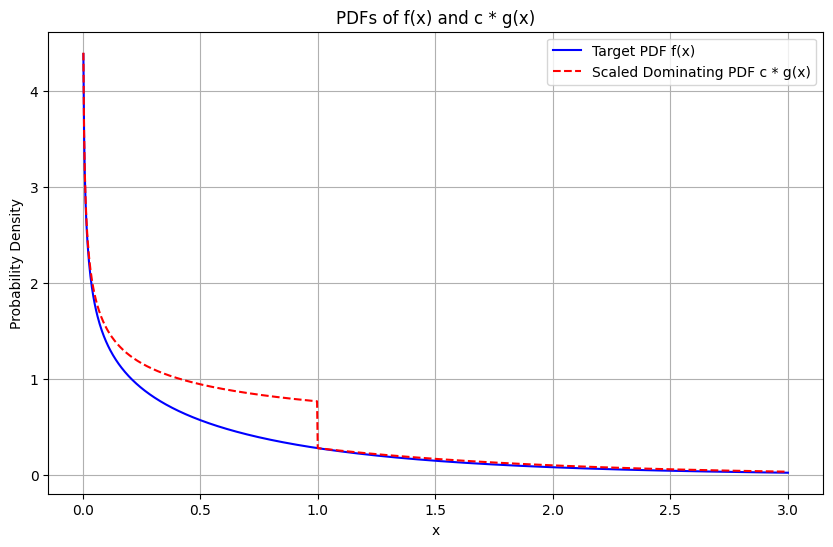

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Congruential Generator (LCG) parameters
LCG_A = 1664525
LCG_C = 1013904223
LCG_M = 2**32
LCG_SEED = 123456789  # Initial seed

class LCG:
    def __init__(self, seed=LCG_SEED):
        """
        Initialize the Linear Congruential Generator with a seed.
        
        Args:
            seed (int): The initial seed. Defaults to LCG_SEED.
        """
        self.state = seed

    def random(self):
        """
        Generate a random number using the Linear Congruential Generator.
        
        Returns:
            float: A random number between 0 and 1.
        """
        self.state = (LCG_A * self.state + LCG_C) % LCG_M
        return self.state / LCG_M

# PDF f(x) = 20 * x * (1 - x)^3
def f(x):
    """
    Calculate the probability density function f(x) = 20 * x * (1 - x)^3.
    
    Args:
        x (float): The input value.
    
    Returns:
        float: The probability density at x.
    """
    return 20 * x * (1 - x) ** 3

# Find the smallest c value
def find_c():
    """
    Find the smallest value of c such that f(x) <= c for all x in [0, 1].
    
    Returns:
        float: The smallest value of c.
    """
    x_values = np.linspace(0, 1, 1000)
    f_values = f(x_values)
    c = np.max(f_values)
    return c

def get_iter_forx(num, c, lcg):
    """
    Generate random values from the distribution f(x) using the rejection sampling method.
    
    Args:
        num (int): The number of random values to generate.
        c (float): The upper bound of the probability density function.
        lcg (LCG): The Linear Congruential Generator instance.
    
    Returns:
        list: A list of generated random values.
        float: The mean number of iterations required to generate each value.
    """
    X_ran = []
    itr_for_x = []

    for _ in range(num):
        count = 1
        while True:
            u = lcg.random()  # U ~ U[0,1]
            x = lcg.random()  # X generated from g, U[0,1]
            fx = f(x)  # f(x) = 20 * x * (1 - x)^3
            if u <= fx / c:
                itr_for_x.append(count)
                X_ran.append(x)
                break
            else:
                count += 1

    # Calculate and print the mean value of iterations
    mean_iterations = np.mean(itr_for_x)
    print(f'The mean value of count of number of iterations for {num} random values is {mean_iterations:.2f}')
    
    return X_ran, mean_iterations

# Create an instance of the Linear Congruential Generator
lcg = LCG()

# Find the smallest value of c
c = find_c()
print(f'The smallest value of c is {c}')

# Perform sampling and analysis for a specific sample size
num_samples = 10000
X_ran, mean_iterations = get_iter_forx(num_samples, c, lcg)import numpy as np
import matplotlib.pyplot as plt

# Linear Congruential Generator (LCG) parameters
LCG_A = 1664525
LCG_C = 1013904223
LCG_M = 2**32
LCG_SEED = 123456789  # Initial seed

class LCG:
    def __init__(self, seed=LCG_SEED):
        """
        Initialize the Linear Congruential Generator with a seed.
        
        Args:
            seed (int): The initial seed. Defaults to LCG_SEED.
        """
        self.state = seed

    def random(self):
        """
        Generate a random number using the Linear Congruential Generator.
        
        Returns:
            float: A random number between 0 and 1.
        """
        self.state = (LCG_A * self.state + LCG_C) % LCG_M
        return self.state / LCG_M

# PDF f(x) = 20 * x * (1 - x)^3
def f(x):
    """
    Calculate the probability density function f(x) = 20 * x * (1 - x)^3.
    
    Args:
        x (float): The input value.
    
    Returns:
        float: The probability density at x.
    """
    return 20 * x * (1 - x) ** 3

# Find the smallest c value
def find_c():
    """
    Find the smallest value of c such that f(x) <= c for all x in [0, 1].
    
    Returns:
        float: The smallest value of c.
    """
    x_values = np.linspace(0, 1, 1000)
    f_values = f(x_values)
    c = np.max(f_values)
    return c

def get_iter_forx(num, c, lcg):
    """
    Generate random values from the distribution f(x) using the rejection sampling method.
    
    Args:
        num (int): The number of random values to generate.
        c (float): The upper bound of the probability density function.
        lcg (LCG): The Linear Congruential Generator instance.
    
    Returns:
        list: A list of generated random values.
        float: The mean number of iterations required to generate each value.
    """
    X_ran = []
    itr_for_x = []

    for _ in range(num):
        count = 1
        while True:
            u = lcg.random()  # U ~ U[0,1]
            x = lcg.random()  # X generated from g, U[0,1]
            fx = f(x)  # f(x) = 20 * x * (1 - x)^3
            if u <= fx / c:
                itr_for_x.append(count)
                X_ran.append(x)
                break
            else:
                count += 1

    # Calculate and print the mean value of iterations
    mean_iterations = np.mean(itr_for_x)
    print(f'The mean value of count of number of iterations for {num} random values is {mean_iterations:.2f}')
    
    return X_ran, mean_iterations

# Create an instance of the Linear Congruential Generator
lcg = LCG()

# Find the smallest value of c
c = find_c()
print(f'The smallest value of c is {c}')

# Perform sampling and analysis for a specific sample size
num_samples = 10000
X_ran, mean_iterations = get_iter_forx(num_samples, c, lcg)

In [89]:
import math

# Linear Congruential Generator (LCG) parameters
LCG_A = 1664525
LCG_C = 1013904223
LCG_M = 2**32
LCG_SEED = 123456789  # Initial seed

# Initialize LCG state
lcg_state = LCG_SEED

def lcg_random():
    global lcg_state
    lcg_state = (LCG_A * lcg_state + LCG_C) % LCG_M
    return lcg_state / LCG_M

# Function to generate Exponential(1) random variable using LCG
def exponential_1():
    return -math.log(lcg_random())

# Function to generate Gamma(3, 1) random variable using LCG
def generate_gamma_3(n):
    samples = []
    for _ in range(n):
        # Sum of 3 Exponential(1) random variables
        sample = exponential_1() + exponential_1() + exponential_1()
        samples.append(sample)
    return samples

# Generate 10,000 samples
n_samples = 10000
samples = generate_gamma_3(n_samples)

# Calculate sample mean and variance
def calculate_mean_variance(samples):
    mean = sum(samples) / len(samples)
    variance = sum((x - mean) ** 2 for x in samples) / len(samples)
    return mean, variance

# Get statistics
mean, variance = calculate_mean_variance(samples)
print(f"Alpha = 3")
print(f"Sample Mean = {mean:.4f}, Sample Variance = {variance:.4f}")
print(f"Theoretical Mean = 3.0000, Theoretical Variance = 3.0000")


Alpha = 3
Sample Mean = 3.0241, Sample Variance = 3.0267
Theoretical Mean = 3.0000, Theoretical Variance = 3.0000


In [83]:
import numpy as np
import math

# Linear Congruential Generator (LCG) parameters
LCG_A = 1664525
LCG_C = 1013904223
LCG_M = 2**32
LCG_SEED = 123456789  # Initial seed

# Initialize LCG state
lcg_state = LCG_SEED

def lcg_random():
    global lcg_state
    lcg_state = (LCG_A * lcg_state + LCG_C) % LCG_M
    return lcg_state / LCG_M

# Generate Exponential(1) random variable using LCG
def exponential_1():
    return -math.log(lcg_random())

# Parameters for Gamma(3.7, 1)
alpha = 3.7
k = int(math.floor(alpha))  # Integer part
theta = alpha - k  # Fractional part

# Constants for Acceptance-Rejection Sampling for fractional part
A = 1 / theta + 1 / math.exp(1)
c = A / math.gamma(theta)

# Define the target PDF f(x) for Gamma(alpha, 1)
def target_pdf(x):
    return (x ** (alpha - 1)) * math.exp(-x) / math.gamma(alpha)

# Define the dominating PDF g(x)
def dominating_pdf(x):
    if x < 1:
        return (x ** (theta - 1)) / A
    else:
        return math.exp(-x) / A

# Inverse CDF for generating samples from g(x)
def inverse_cdf(u):
    if u < 1 / (theta * A):
        return (theta * A * u) ** (1 / theta)
    else:
        return -math.log(1 - u)

# Acceptance-Rejection Sampling for fractional part
def acceptance_rejection_sampling(n):
    samples = []
    while len(samples) < n:
        u1 = lcg_random()
        X = inverse_cdf(u1)
        u2 = lcg_random()
        if (c * dominating_pdf(X)) * u2 <= target_pdf(X):
            samples.append(X)
    return samples

# Function to generate Gamma(k, 1) random variable
def generate_gamma_k(n, k):
    samples = []
    for _ in range(n):
        sample = sum(exponential_1() for _ in range(k))
        samples.append(sample)
    return samples

# Function to generate Gamma(3.7, 1) random variable using the algorithm
def generate_gamma_37(n):
    integral_samples = generate_gamma_k(n, k)  # Generate Gamma(3, 1) samples
    fractional_samples = acceptance_rejection_sampling(n)  # Generate Gamma(0.7, 1) samples
    samples = [i + f for i, f in zip(integral_samples, fractional_samples)]
    return samples

# Generate 10,000 samples
n_samples = 10000
samples = generate_gamma_37(n_samples)

# Calculate sample mean and variance
def calculate_mean_variance(samples):
    mean = np.mean(samples)
    variance = np.var(samples)
    return mean, variance

# Get statistics
sample_mean, sample_variance = calculate_mean_variance(samples)

# Theoretical mean and variance
theoretical_mean = alpha
theoretical_variance = alpha

print(f"Alpha = {alpha}:")
print(f"Sample Mean = {sample_mean:.4f}, Sample Variance = {sample_variance:.4f}")
print(f"Theoretical Mean = {theoretical_mean:.4f}, Theoretical Variance = {theoretical_variance:.4f}")


Alpha = 3.7:
Sample Mean = 5.4142, Sample Variance = 4.1354
Theoretical Mean = 3.7000, Theoretical Variance = 3.7000
